In [113]:
import numpy as np
from ssa import *
from lds import *
import matplotlib.pyplot as plt

In [ ]:
eps = 0.03
target = -0.1

In [115]:
n=32

In [116]:
A = np.random.normal(0, 1.0, size=(n, n))

In [117]:
fAs(A, 0.0)[0:2]

(6.7589314448658335, -137.40745550466423)

In [118]:
s_absc = np.max([np.real(eig) for eig in np.linalg.eigvals(A)])
s_absc

6.3648111500841145

In [119]:
a_e, del_s_a_e = ssa(A, eps, start_at_absc = True, method="newton")

In [120]:
print(f"smoothed spectral abscissa: {a_e}")
print(f"spectral_abscissa: {s_absc}")

smoothed spectral abscissa: 6.385160974175662
spectral_abscissa: 6.3648111500841145


In [121]:
orig_A = np.copy(A)
B, s_abscs, ss_abscs = optimize_ssa(A, eps, target, step_size=1.0, iters=50, show_prog=True)

100%|██████████| 50/50 [00:00<00:00, 154.46it/s]


In [122]:
ss_abscs[-1]

-0.09999906568110535

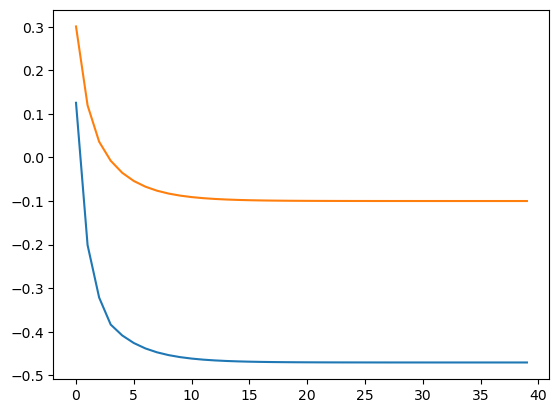

In [123]:
plt.plot(s_abscs[10:50])
plt.plot(ss_abscs[10:50])

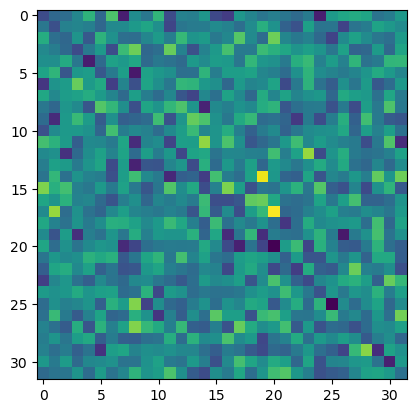

In [124]:
plt.imshow(B)

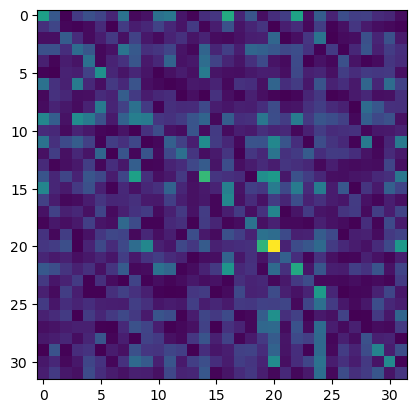

In [125]:
plt.imshow(np.abs(orig_A - B))

In [126]:
def graph_fAs(pr=False):
    xs = np.linspace(a_e - 2.0, a_e + 2.0, num=50)
    ys = np.array([fAs(A, x, False)[0] for x in xs])
    if pr: print(ys)

    plt.plot(xs, ys)
    plt.vlines([s_absc], ymin=np.min(ys) - 10.0, ymax=np.max(ys) + 10.0, colors="BLACK", linestyles="dashed", label="abscissa")
    plt.vlines([a_e], ymin=np.min(ys) - 10.0, ymax=np.max(ys) + 10.0, colors="RED", linestyles="dashed", label="a_e")
    plt.show()

In [127]:
C = np.copy(B)

In [128]:
C = mutate(C, eps, target, step_size=0.01)
ssa(C, eps)[0]

-0.09893002814597437

In [129]:
x_0 = np.zeros(shape=(n,))
x_0[0] = 1.0

In [130]:
B_xs = lds(B, x_0, iters=500, dt=0.003)
C_xs = lds(C, x_0, iters=500, dt=0.003)

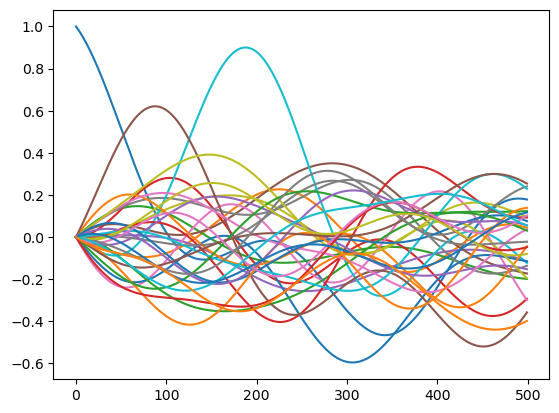

In [131]:
plt.plot(B_xs)
plt.show()

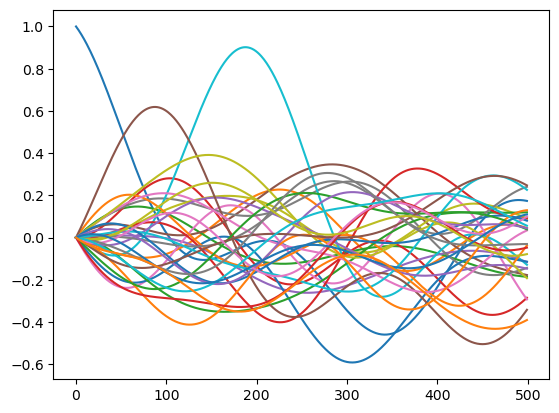

In [132]:
plt.plot(C_xs)
plt.show()

0.018288776946891794
0.3198174378050506


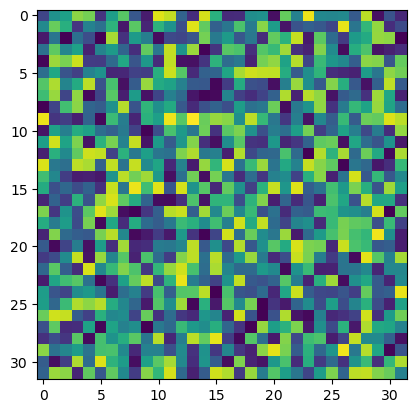

In [133]:
print(np.max(np.abs(C-B)))
print(np.sqrt(np.sum(np.power(C - B, 2.0))))
plt.imshow(np.abs(C - B))

(array([ 11.,  21., 104., 210., 269., 251., 113.,  35.,   8.,   2.]),
 array([-3.89089105, -3.05303245, -2.21517384, -1.37731524, -0.53945663,
         0.29840197,  1.13626057,  1.97411918,  2.81197778,  3.64983639,
         4.48769499]),
 <BarContainer object of 10 artists>)

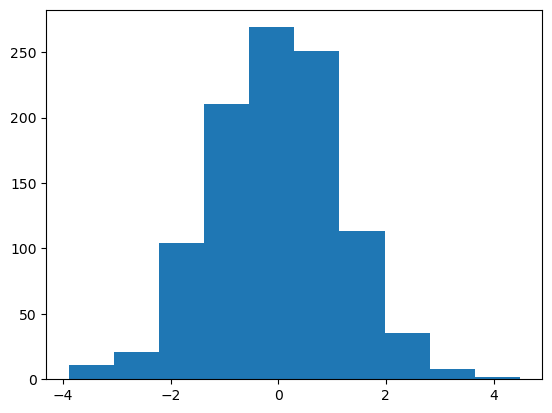

In [134]:
plt.hist(np.ravel(C))

In [135]:
D = np.copy(B)
xs, tangent_thetas, abscs, s_abscs, s_norms, F_norms = linear_hebbian_stable(D, x_0, eps, target, iters=500, beta=0.0, dA=0.02)

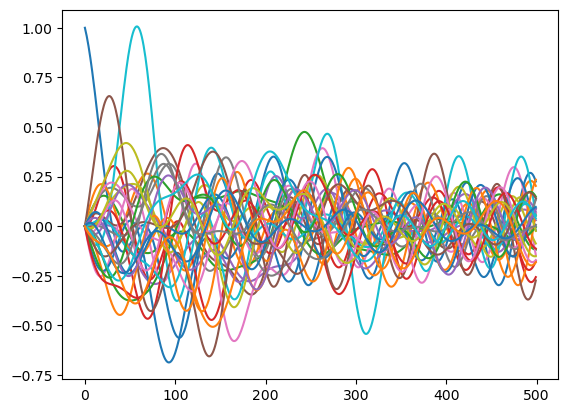

In [136]:
plt.plot(xs)
plt.show()

In [137]:
D_xs = lds(D, x_0, iters=500, dt=0.01)

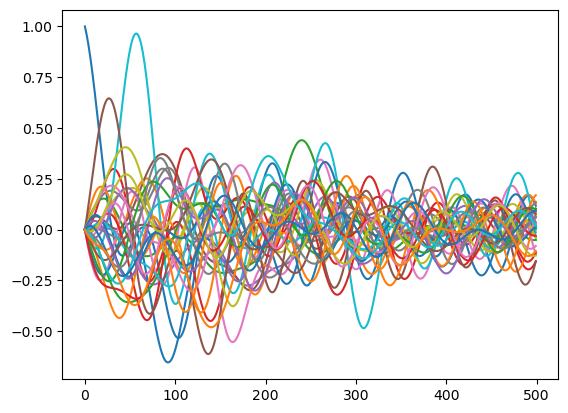

In [138]:
plt.plot(D_xs)
plt.show()

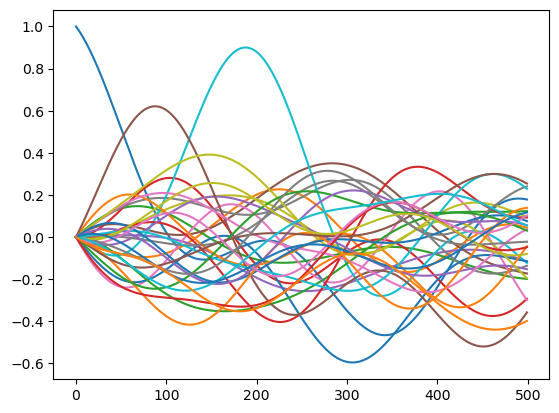

In [139]:
plt.plot(B_xs)
plt.show()

0.0
0.0


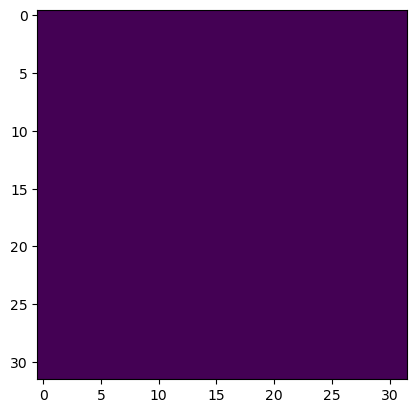

In [140]:
print(np.max(np.abs(D-B)))
print(np.sqrt(np.sum(np.power(D - B, 2.0))))
plt.imshow(np.abs(D - B))